In [3]:
import matplotlib.pyplot as plt
import math

# Physical Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
TIMESTEP = 3600 * 24  # Time step for simulation (1 day in seconds)

# Sun and Planet Data
sun = {'mass': 1.989e30, 'x': 0, 'y': 0, 'vx': 0, 'vy': 0, 'color': 'yellow'}

earth = {
    'mass': 5.972e24, 
    'x': -1.496e11,  # 1 AU in meters
    'y': 0, 
    'vx': 0, 
    'vy': 29783,     # Earth's average orbital velocity in m/s
    'color': 'blue'
}

# A list to hold all the planets you want to simulate
planets = [earth]

In [6]:
# Lists to store the path of the planet for plotting later
x_history = []
y_history = []

# Loop 365 times (for 365 days)
for _ in range(365):
    # This loop goes through each planet in your list (right now, just Earth)
    for planet in planets:
        # Calculate distance from the sun
        distance_x = sun['x'] - planet['x']
        distance_y = sun['y'] - planet['y']
        distance = math.sqrt(distance_x**2 + distance_y**2)

        # Calculate gravitational force (F = G * M1*M2 / r^2)
        force = G * sun['mass'] * planet['mass'] / distance**2
        
        # Find the angle to break the force into x and y components
        theta = math.atan2(distance_y, distance_x)
        force_x = math.cos(theta) * force
        force_y = math.sin(theta) * force

        # Calculate acceleration (a = F/m)
        ax = force_x / planet['mass']
        ay = force_y / planet['mass']

        # Update velocity (v_new = v_old + a * t)
        planet['vx'] += ax * TIMESTEP
        planet['vy'] += ay * TIMESTEP

        # Update position (p_new = p_old + v * t)
        planet['x'] += planet['vx'] * TIMESTEP
        planet['y'] += planet['vy'] * TIMESTEP
        
        # Save the planet's current position to our history lists
        x_history.append(planet['x'])
        y_history.append(planet['y'])

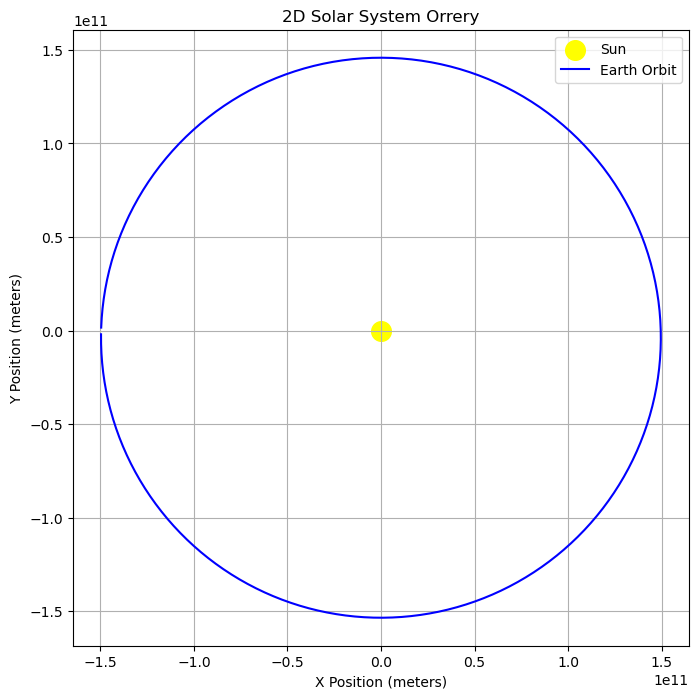

In [7]:
# Create a plot figure
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the Sun at the center
ax.scatter(sun['x'], sun['y'], color=sun['color'], s=200, label='Sun') # s is size

# Plot the Earth's orbital path
ax.plot(x_history, y_history, color=earth['color'], label='Earth Orbit')

# --- Customize the plot ---
# Make the plot square so the orbit isn't stretched
ax.set_aspect('equal')

# Add a title and labels
ax.set_title('2D Solar System Orrery')
ax.set_xlabel('X Position (meters)')
ax.set_ylabel('Y Position (meters)')

# Add a grid and legend
ax.grid(True)
ax.legend()

# Show the final plot
plt.show()